In [1]:
import numpy as np
import pandas as pd

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

In [4]:
data = np.arange(10)

In [5]:
data

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

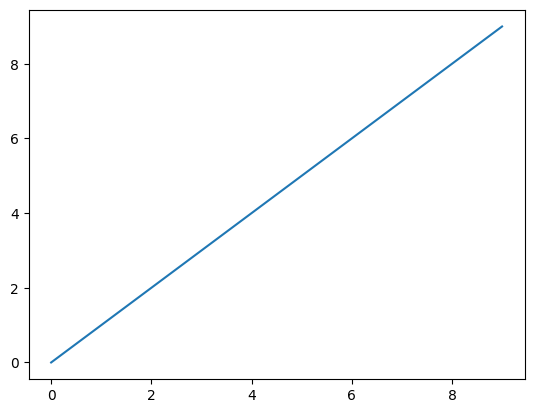

In [6]:
plt.plot(data)

In [7]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

In [8]:
ax1 = fig.add_subplot(2, 2, 1)

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2, 3)

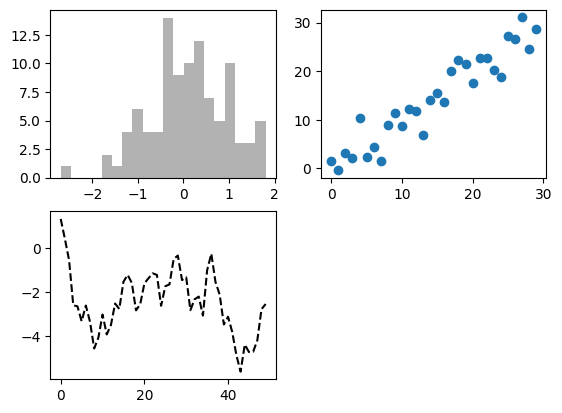

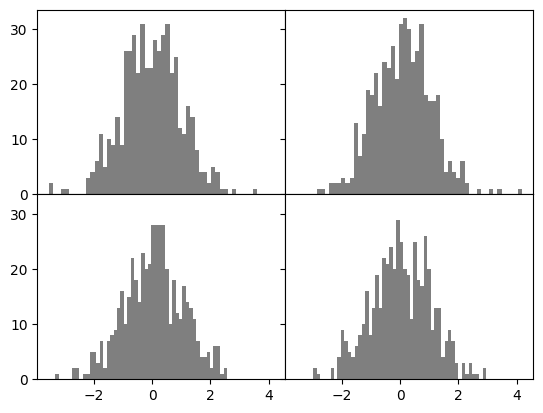

In [17]:
fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(np.random.standard_normal(50).cumsum(), color="black", linestyle="dashed")
ax1.hist(np.random.standard_normal(100), bins=20, color="black", alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.standard_normal(30))
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.standard_normal(500), bins=50, color="black", alpha=0.5)
fig.subplots_adjust(wspace=0, hspace=0)

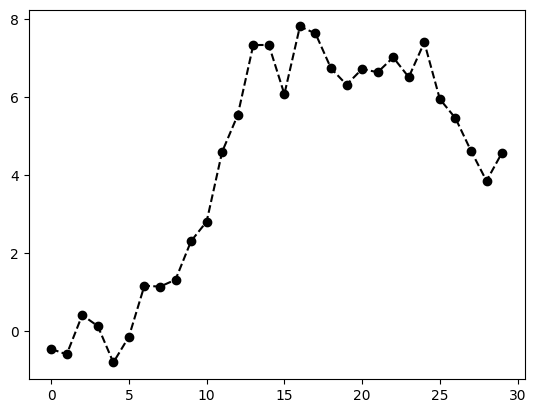

In [21]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.standard_normal(30).cumsum(), color="black", linestyle="dashed", marker="o")

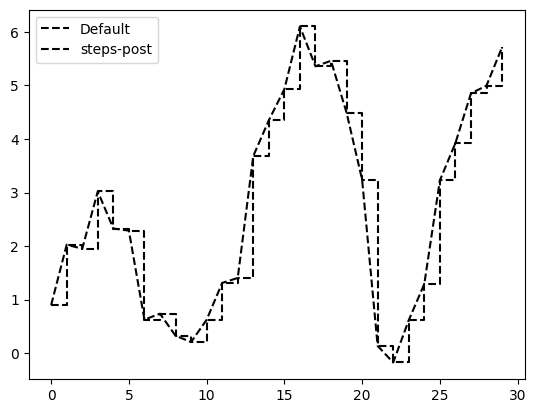

In [22]:
fig = plt.figure()
ax = fig.add_subplot()
data = np.random.standard_normal(30).cumsum()
ax.plot(data, color="black", linestyle="dashed", label="Default")
ax.plot(data, color="black", linestyle="dashed", drawstyle="steps-post", label="steps-post")
ax.legend()

Text(0.5, 1.0, 'My (almost) first matplotlib plot')

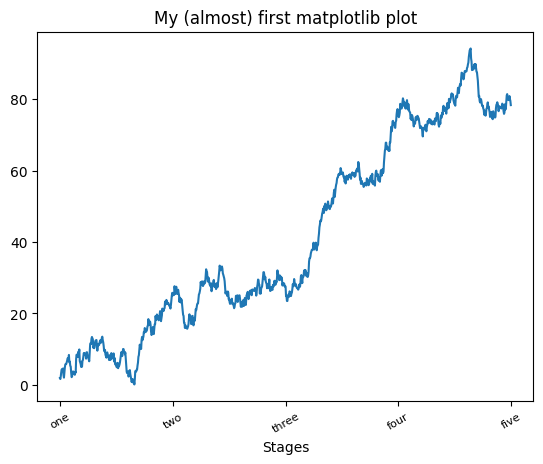

In [29]:
fig = plt.figure()
ax = fig.add_subplot()
#fig, ax = plt.subplots()
ax.plot(np.random.standard_normal(1000).cumsum())
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
labels = ax.set_xticklabels(["one", "two", "three", "four", "five"], rotation=30, fontsize=8)
ax.set_xlabel("Stages")
ax.set_title("My (almost) first matplotlib plot")

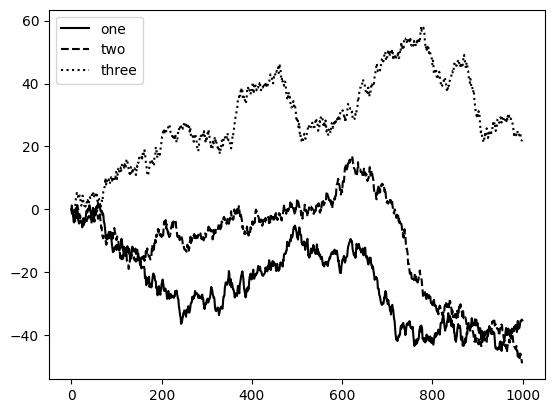

In [30]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.random.randn(1000).cumsum(), color="black", label="one")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dashed", label="two")
ax.plot(np.random.randn(1000).cumsum(), color="black", linestyle="dotted", label="three")
ax.legend()

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

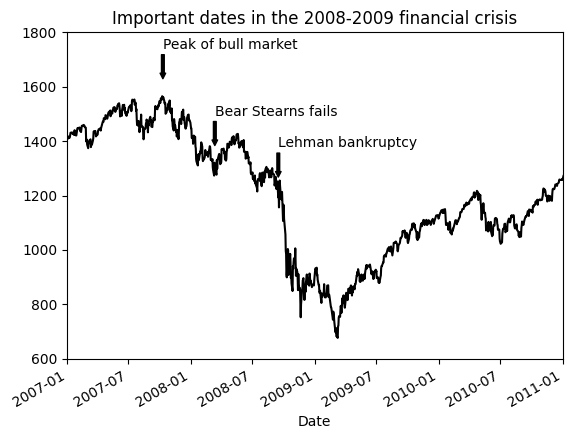

In [37]:
from datetime import datetime

fig, ax = plt.subplots()
url = "https://github.com/wesm/pydata-book/blob/3rd-edition/examples/spx.csv?raw=true"
data = pd.read_csv(url, index_col=0, parse_dates=True)
spx = data["SPX"]

spx.plot(ax=ax, color="black")

crisis_data = [
    (datetime(2007, 10, 11), "Peak of bull market"),
    (datetime(2008, 3, 12), "Bear Stearns fails"),
    (datetime(2008, 9, 15), "Lehman bankruptcy")
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
               xytext=(date, spx.asof(date) + 225),
               arrowprops=dict(facecolor="black", headwidth=4, width=2, headlength=4),
               horizontalalignment="left", verticalalignment="top")
    
ax.set_xlim(["1/1/2007", "1/1/2011"])
ax.set_ylim([600, 1800])

ax.set_title("Important dates in the 2008-2009 financial crisis")

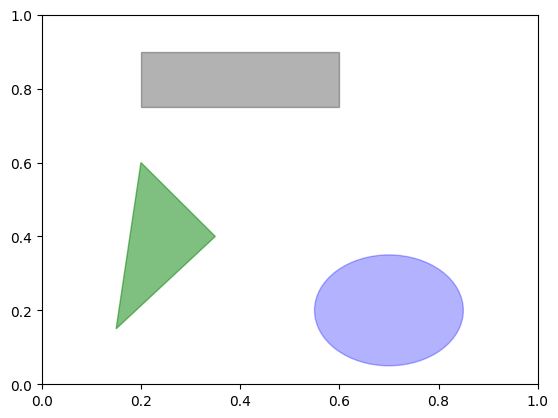

In [38]:
fig, ax = plt.subplots()

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color="black", alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color="blue", alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color="green", alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

In [ ]:
fig.savefig("figpath.svg")
fig.savefig("figpath.png", dpi=400)

<Axes: >

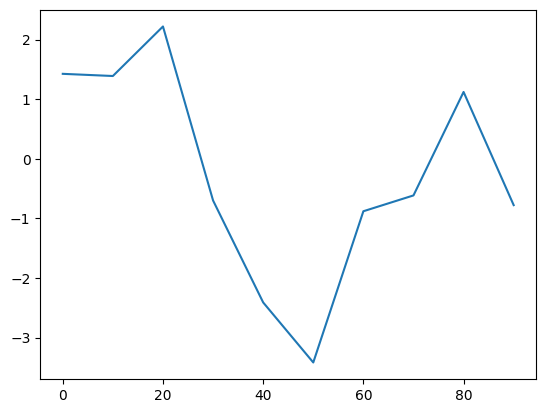

In [39]:
s = pd.Series(np.random.standard_normal(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<Axes: >

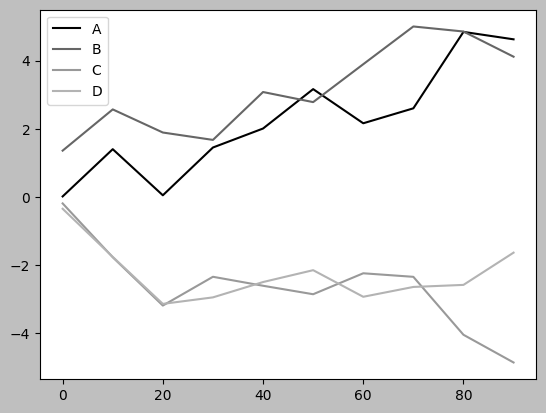

In [40]:
df = pd.DataFrame(np.random.standard_normal((10, 4)).cumsum(0),
                 columns=["A", "B", "C", "D"],
                 index=np.arange(0, 100, 10))
plt.style.use("grayscale")
df.plot()

<Axes: >

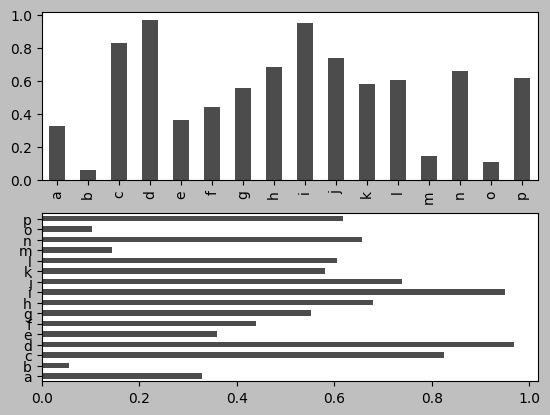

In [41]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.uniform(size=16), index=list("abcdefghijklmnop"))
data.plot.bar(ax=axes[0], color="black", alpha=0.7)
data.plot.barh(ax=axes[1], color="black", alpha=0.7)

<Axes: >

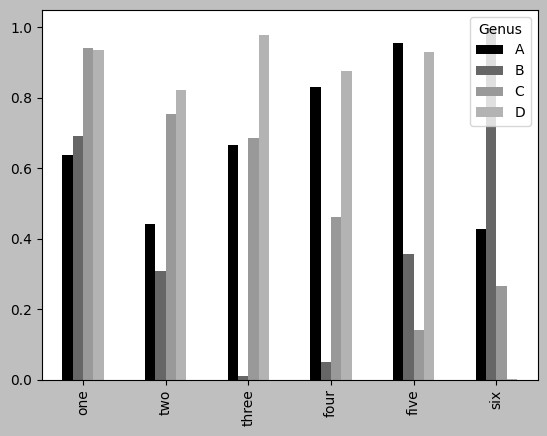

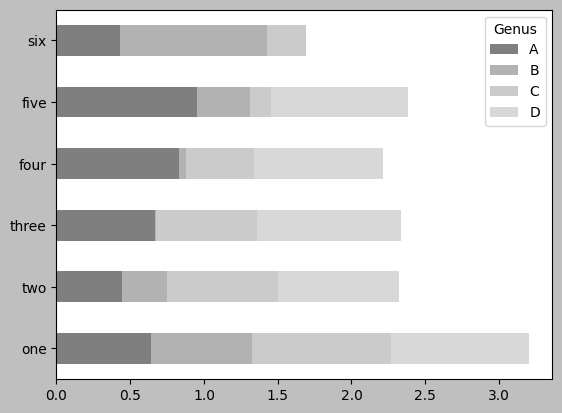

In [43]:
df = pd.DataFrame(np.random.uniform(size=(6, 4)),
                 index=["one", "two", "three", "four", "five", "six"],
                 columns=pd.Index(["A", "B", "C", "D"], name="Genus"))
df
df.plot.bar()
df.plot.barh(stacked=True, alpha=0.5)

<Axes: xlabel='day'>

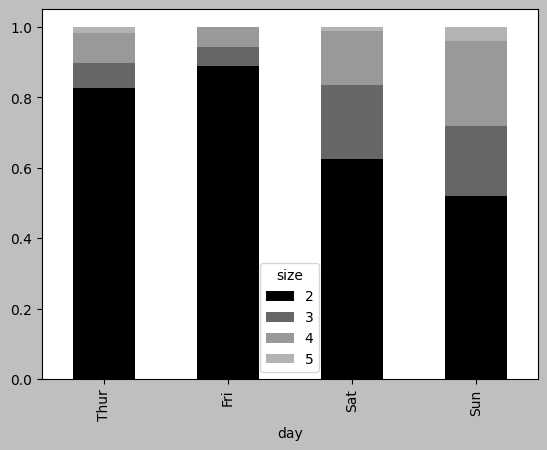

In [47]:
url = "https://github.com/wesm/pydata-book/blob/3rd-edition/examples/tips.csv?raw=true"
tips = pd.read_csv(url)
tips.head()

party_counts = pd.crosstab(tips["day"], tips["size"])
party_counts = party_counts.reindex(index=["Thur", "Fri", "Sat", "Sun"])
party_counts = party_counts.loc[:, 2:5]
party_pcts = party_counts.div(party_counts.sum(axis="columns"), axis="index")
party_pcts.plot.bar(stacked=True)

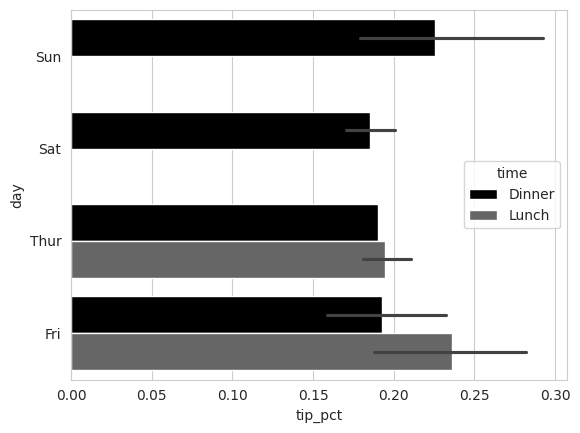

In [53]:
import seaborn as sns

tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
sns.barplot(x="tip_pct", y="day", hue="time", data=tips, orient="h")
sns.set_style("whitegrid")
sns.set_palette("Greys_r")

<Axes: ylabel='Frequency'>

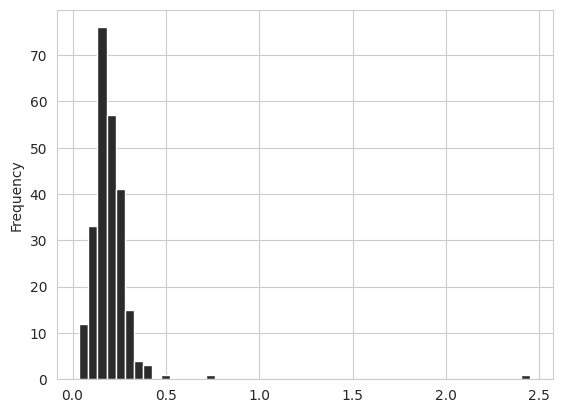

In [54]:
tips["tip_pct"].plot.hist(bins=50)

In [57]:
import scipy

<Axes: ylabel='Density'>

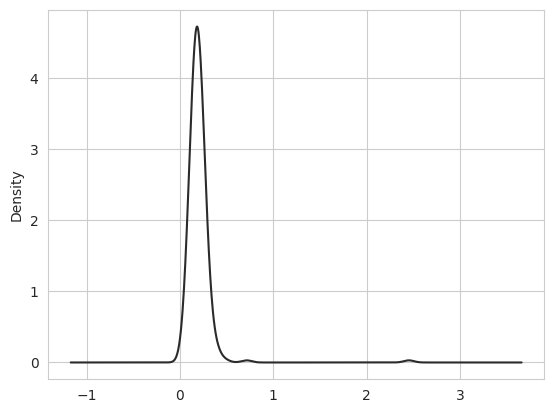

In [58]:
tips["tip_pct"].plot.density()

<Axes: ylabel='Count'>

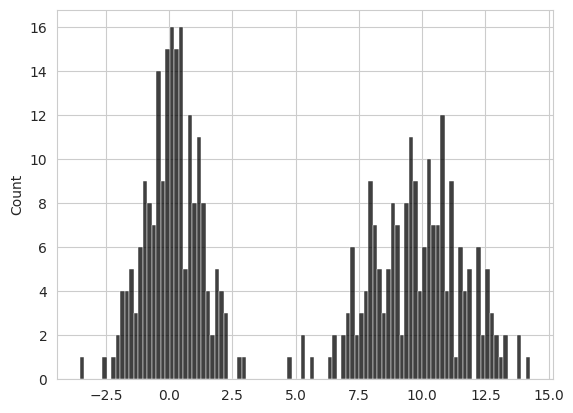

In [59]:
comp1 = np.random.standard_normal(200)
comp2 = 10 + 2 * np.random.standard_normal(200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.histplot(values, bins=100, color="black")

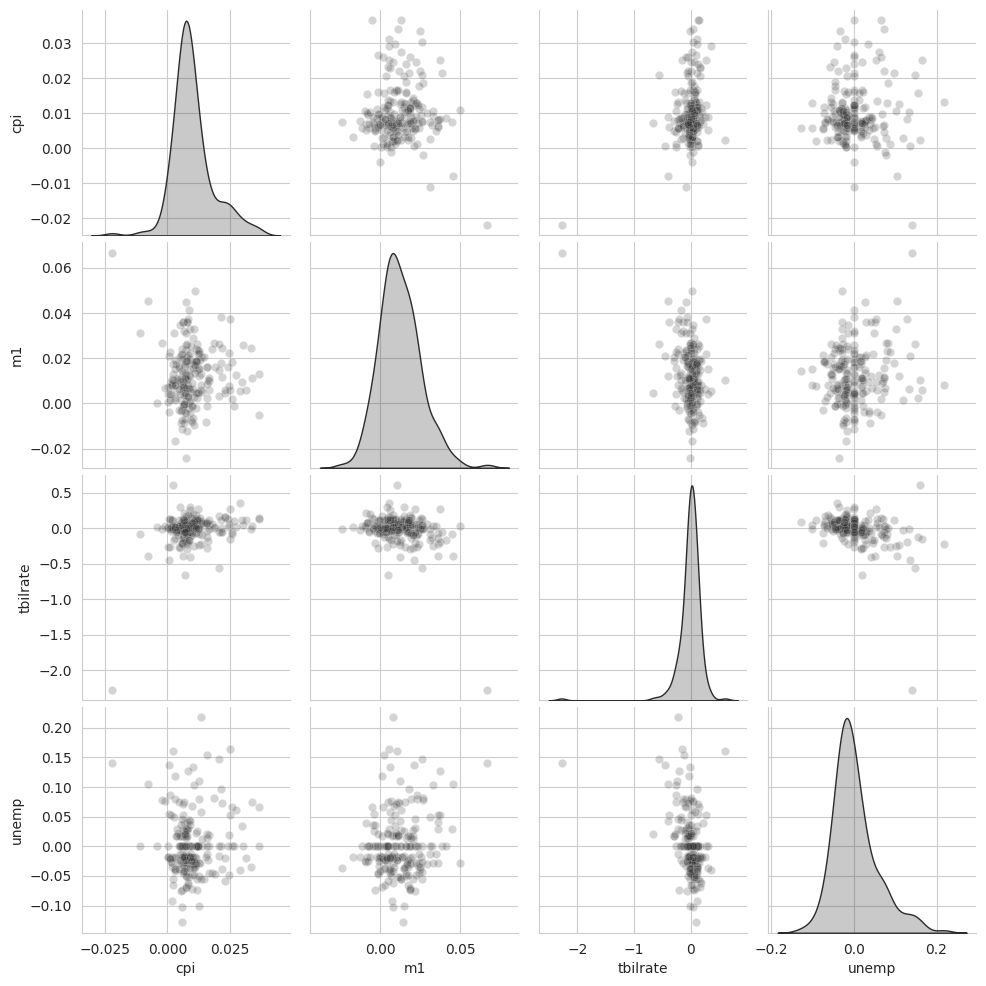

In [63]:
url = "https://github.com/wesm/pydata-book/blob/3rd-edition/examples/macrodata.csv?raw=true"
macro = pd.read_csv(url)

data = macro[["cpi", "m1", "tbilrate", "unemp"]]
trans_data = np.log(data).diff().dropna()
trans_data.tail()

#ax = sns.regplot(x="m1", y="unemp", data=trans_data)
#ax.title("Changes in log(m1) versus log(unemp)")
sns.pairplot(trans_data, diag_kind="kde", plot_kws={"alpha": 0.2})

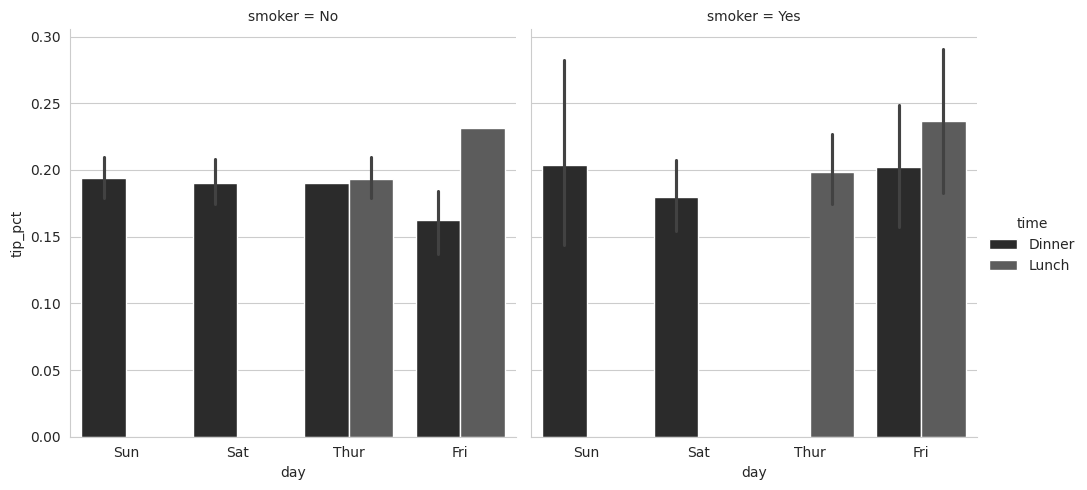

In [64]:
sns.catplot(x="day", y="tip_pct", hue="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

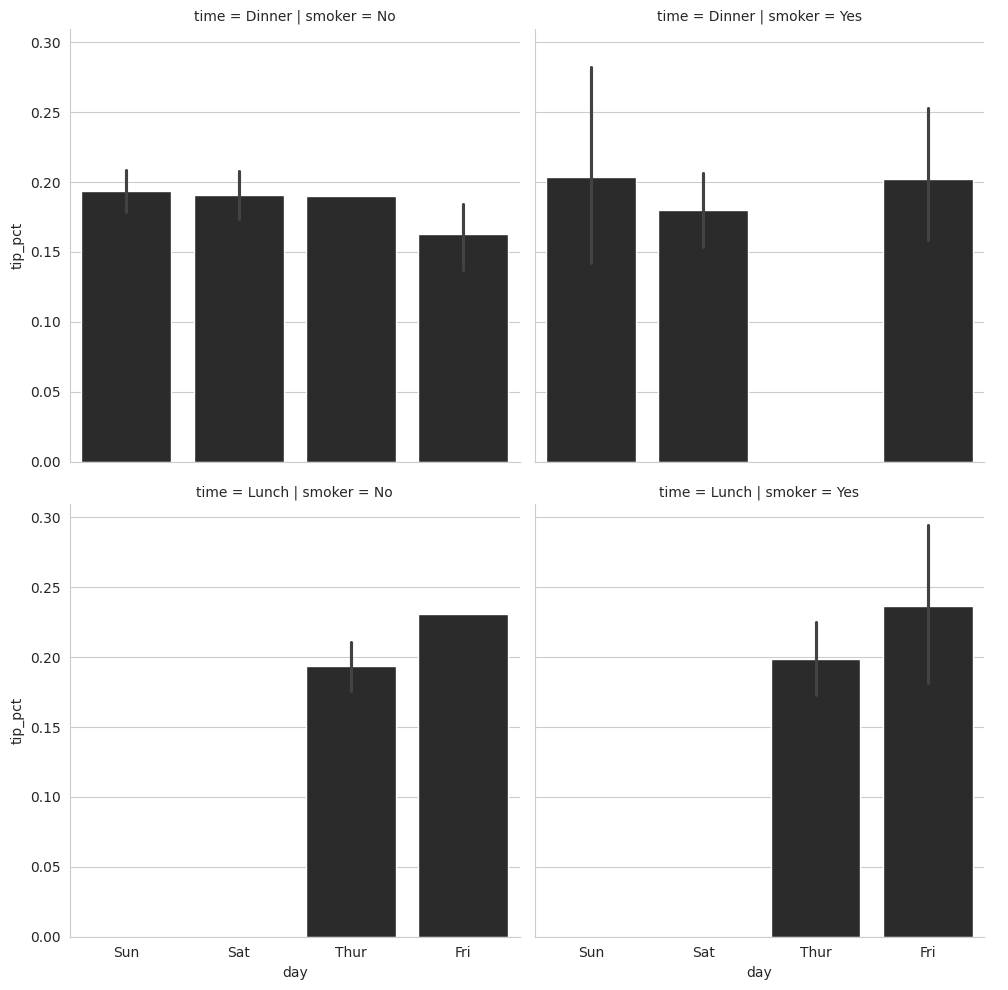

In [65]:
sns.catplot(x="day", y="tip_pct", row="time", col="smoker", kind="bar", data=tips[tips.tip_pct < 1])

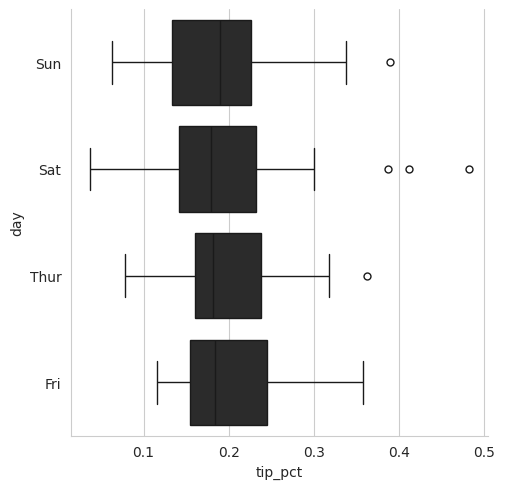

In [66]:
sns.catplot(x="tip_pct", y="day", kind="box", data=tips[tips.tip_pct < 0.5])